In [ ]:
latent_dim = 128

In [1]:
pip install requests

In [2]:
pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
import os

# Set the latent dimension
latent_dim = 128

# URL of the model file on GitHub
model_url = 'https://github.com/mishraashu6566/Radio-Halos-Classification-with-MWA/raw/2d712ec2f3f70080f44f928529aa9aa39909ddff/cwgann3-gen.model'
model_path = 'cwgann3-gen.model'

def download_model(url, path):
    response = requests.get(url, allow_redirects=True)
    open(path, 'wb').write(response.content)




In [5]:
def sample_images():
    r, c = 4, 4

    # Download the model if it doesn't exist
    if not os.path.isfile(model_path):
        print(f"Downloading model from {model_url}...")
        download_model(model_url, model_path)

    noise = np.random.normal(0, 1, (r * c, latent_dim))

    # Load the pre-trained model
    generator = tf.keras.models.load_model(model_path)

    # Generate labels
    index = np.random.randint(0, 10, 16)
    sampled_labels = index

    # Generate fake samples
    gen_imgs = generator.predict([noise, sampled_labels])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Prepare images for plotting
    X = [np.reshape(gen_imgs[j], (64, 64)) for j in range(len(gen_imgs))]
    X = np.array(X)

    # Plot images
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(X[cnt])
            axs[i, j].axis('off')
            if i == 0:
                axs[i, j].set_title('Generated')
            cnt += 1

    plt.show()
    plt.savefig("generated_images.png")
    plt.close()



1/1 [==============================] - 0s 480ms/step


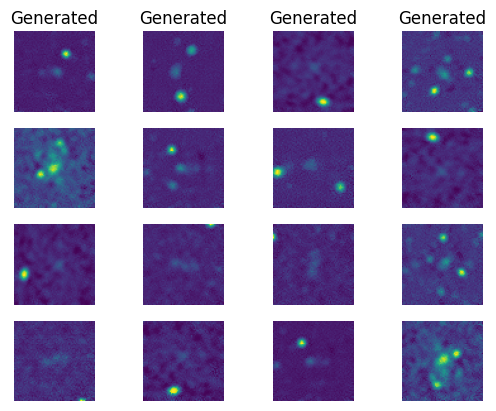

In [6]:
# Call the function to sample images
sample_images()